<div style='text-align: center;'>
<img src="images/math60082-banner.png" alt="image" width="80%" height="auto">
</div>

# Lab Class - Week 4
## Dr P. V. Johnson
## Department of Mathematics

# This Week

- Demo 4.1 Random numbers
- Demo 4.2 Distributions
- Demo 4.3 Monte Carlo

# Demo 4.1: Random Numbers

- A computer can **only** generate a random sequence of integers, but of course we can then take that sequence of integers and convert it to any required distribution. 
- Some of the conversions are simple but others are more complex, luckily we now have python libraries that can convert them to all standard distributions (more on this later).
- The way random numbers work means you will always have to create a generator and then call a function to receive the next number in the sequence.
- Reproducibility is an important feature any scientific experiment (see [this article](https://www.thesun.co.uk/news/11642959/neil-ferguson-stay-at-home-lockdown-advice-unreliable-code/) for an example of what might happen if you can't do this)

## Rolling the Dice

Consider an example where we want to evaluate a strategy to play a board game. To simulate the game (potentially millions of times) and see how our strategy performs, we might need to get a set of independent dice rolls as we would in real life.

We are going to use the `numpy` random library rather than the standard python one, as apparently there are some better number generators in there. Import the library:

In [1]:
import numpy

Next we are going to create a random number generator using the default setting (as recommended on the numpy documentation)

In [2]:
rng = numpy.random.default_rng(seed=0) # create a random number generator and reset the starting value
print(rng) # check this is a PCG64 generator
for i in range(0,4): ## loop over a few rolls
    roll = rng.integers(1,7)
    print("Next roll of dice is:=",roll)

Generator(PCG64)
Next roll of dice is:= 6
Next roll of dice is:= 4
Next roll of dice is:= 4
Next roll of dice is:= 2


If you wanted to roll twice at each stage (independent still of course) you can add a `size=(2)` argument to return a vector (or array) of two random numbers.

In [3]:
for i in range(0,4): ## loop over a few rolls
    rolls = rng.integers(1,7,size=(2)) # this time get 2 numbers every time
    print("Sum of two rolls of the dice is:=",rolls[0]+rolls[1]) # sum them up

Sum of two rolls of the dice is:= 3
Sum of two rolls of the dice is:= 2
Sum of two rolls of the dice is:= 7
Sum of two rolls of the dice is:= 10


Other random number generators (called a `BitGenerator`) are available, including the classic `MT19937` which was the go to standard generator for many years. Once setup, the same function calls can be use on any generator. The syntax is
~~~
<variable name> = numpy.random.Generator( numpy.random.<BitGenerator>( seed=<seed> ) )
~~~
and the available generators are 
- MT19937
- PCG64
- PCG64DXSM
- Philox
- SFC64

We will be interested in how they perform statistically (how independent are the sequences), how fast they generate new numbers, and how easily they can be parallelised.

In [4]:
rng = numpy.random.Generator(numpy.random.MT19937(seed=0)) # create a random number generator
print(rng)
for i in range(0,4):
    print("Next roll of dice is:=",rng.integers(1,7))

Generator(MT19937)
Next roll of dice is:= 3
Next roll of dice is:= 4
Next roll of dice is:= 2
Next roll of dice is:= 3


You might have noticed that no matter how many times you run this code, the rolls always return the same number. This is in fact desired, as it makes our code reproducible. If you want to simulate more runs, simply increase the range or run the code in another cell *without* declaring the generator again.

In [5]:
for i in range(0,4):
    print("Next roll of dice is:=",rng.integers(1,7))

Next roll of dice is:= 1
Next roll of dice is:= 3
Next roll of dice is:= 4
Next roll of dice is:= 6


When doing numerical computations it is hardly ever required to start the sequence of with a random start point, since you are only ever interested in what happens on average over a large number of simulations. In your code, you should only ever declare a single instance of the generator. Setting up the generator takes time (much longer than getting the next number in the sequence).

In [6]:
# just do this line once in your code
rng = numpy.random.default_rng(seed=0) # create a random number generator and reset the starting value

From now on we will keep the default rng.

# Demo 4.2: Distributions

Now we have a random number generator we can sample from the available probility distributions. The most common used in finance would be:
- `normal` the normal distribution $x\sim N(\mu,\sigma^2)$ with mean $\mu$ and variance $\sigma^2$
- `uniform` the uniform distribution $x\sim U(a,b)$ over the interval $[a,b]$ can be used to calculate if an event happens according to some known probability
- `exponential` the exponential distribution $x\sim$ Exp $(\lambda)$ with rate parameter $\lambda$ to generate the waiting time of a Poisson distribution with mean $\lambda$

# Tasks

- generate 1000 numbers from each of the distributions, and plot out a histogram of the frequency distribution
- regenerate the graphs with $n=10,000$ $n=100,000$ $n=1,000,000$ numbers from the distribution, what do you notice happens?

Let's go through the example for a uniform distribution then you can try with the others. First get 1000 numbers from the distribution and store it in an array:

In [7]:
xi = rng.uniform(0.0,1.0,size=(1000))

Now import the plotting library:

In [8]:
import matplotlib.pyplot as plt

Create a histogram using the `hist` function in `matplotlib.pyplot`

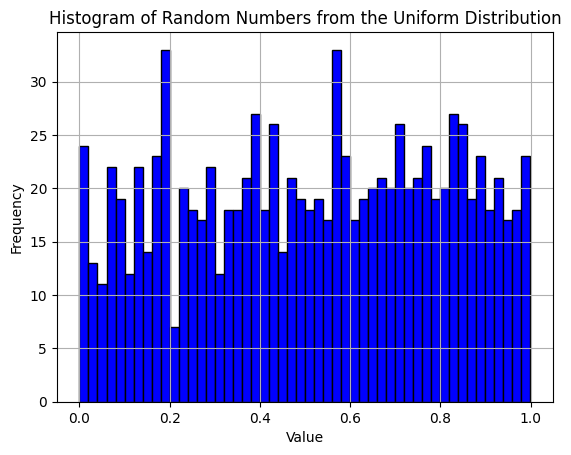

In [9]:
plt.hist(xi, bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Random Numbers from the Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Looks like the correct result, we can see some random variations in there as expected. Try the other distributions yourself and see what happens as $n$ gets bigger.

# Demo 4.3: Monte Carlo

Assume $x \sim N(0,1)$ is a random draw from the normal distribution, the random variable $F=f(x)$, and the function $f(x)$ is given by
$$
f(x) = \begin{cases}
x^2 & \text{ if } x \leq 0 \\
0 & \text{ if } x > 0
\end{cases}.
$$
Use Monte Carlo simulations, can you calculate the expectation $V=\text{E}[F]$?

According to Monte Carlo methods we can approximate the expectation using the average of $N$ simulations, so
$$
E[F] \approx \frac{1}{N} \sum_{n=1}^N f(x_n)
$$
where $x_n$ is $n$th random draw from a normal distribution.

The most efficient way to setup your code is to run a single command on the random number generator to get the $N$ random numbers, and then go through the loop and sum up the payoffs.

In [10]:
N=100
x = rng.normal(0.0,1.0,size=(N))

sum = 0.0
for n in range(0,N):
    Fn = 0.0
    if x[n] < 0.0:
        Fn = x[n]*x[n]
    sum = sum + Fn
result = sum / N 
print( "Result with",N,"paths is:=",result)

Result with 100 paths is:= 0.6354018980238313


The result looks reasonable, but to do anything interesting we will need to make a function so we can call this multiple times and analyse the results.

In [11]:
# pass in your random number generator as an argument. When you run this multiple times you want to make sure you use the next set of numbers in the sequence
def monteCarlo(N,rng):
    # generate
    x = rng.normal(0.0,1.0,size=(int(N)))
    sum = 0.0
    for n in range(0,int(N)):
        Fn = 0.0
        if x[n] < 0.0:
            Fn = x[n]*x[n]
        sum = sum + Fn
    return sum / N 

Now we can generate a plot using different values of $N$, for example $N=1000,2000,...$.

Text(0, 0.5, 'E[F]')

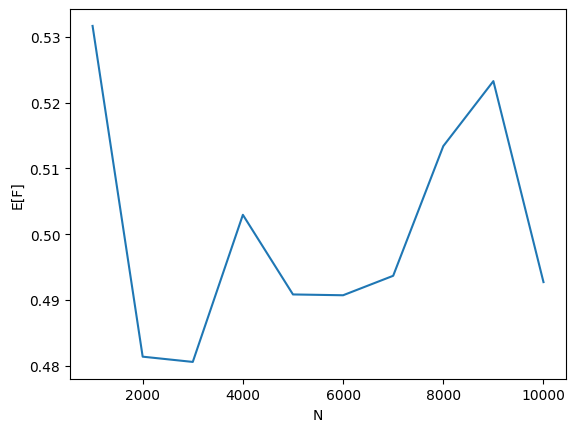

In [12]:
import matplotlib.pyplot as plt

numberOfResults = 10
# setup some vectors to store the results
Narray = numpy.zeros(numberOfResults)
Varray = numpy.zeros(numberOfResults)
# loop over different values of N
for i in range(0,numberOfResults):
    Narray[i] = (i+1)*1000
    Varray[i] = monteCarlo(Narray[i],rng)
plt.plot(Narray, Varray)
plt.xlabel("N")
plt.ylabel("E[F]")

# Tasks

- Change the value of `numberOfResults` to 20, 40, 80 and more. What properties can you identify in the graphs? Be careful, as $N$ gets large so do the computation times!
- Calculate the value using numerical quadrature:-
$$
V = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^0 x^2 e^{-x^2/2} dx
$$
and use it to check the accuracy of your code. Do the results match?
- How can you definitively say what the error is, given that for any value of $N$ you generate a random result every time? _Hint: think about the variance of your result._
- How efficient is your code? Test different random number generators to see which one is best. For the more confident student, you might also investigate ways to speed up the calculations using the `numba` or `cython` libraries.